In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from numpy.random import seed
from scipy.stats import norm

In [35]:
df = pd.read_excel('../DATA/default of credit card clients.xls', skiprows=range(1))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [36]:
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [37]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [38]:
df_bill_pay = df[ ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'] ]
df_bill_pay.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


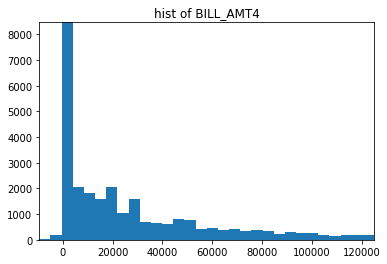

In [39]:
bill = df_bill_pay.BILL_AMT4[ df_bill_pay['BILL_AMT4'] < 125000 ]
bill = bill[ bill>-10000]
_= plt.hist(bill, bins=30)
_= plt.autoscale(enable=True, tight=True)
_= plt.title('hist of BILL_AMT4')
_= plt.autoscale(enable=True, tight=True)
_= plt.grid(False)
_= plt.show()   

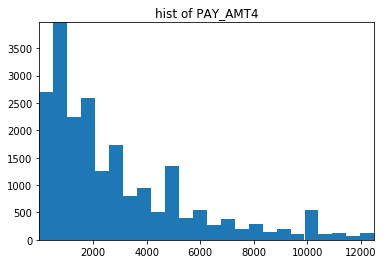

In [40]:
pay = df_bill_pay.PAY_AMT4[ df_bill_pay['PAY_AMT4'] < 12500 ]
pay = pay[ pay != 0 ]
pay.apply(np.log)
_= pay.hist(bins=24)
_= plt.autoscale(enable=True, tight=True)
_= plt.title('hist of PAY_AMT4')
_= plt.grid(False)
_= plt.show()   

In [41]:
df['bill-pay-com-binary'] = df.apply(lambda row: 0 if row['PAY_AMT1'] < row['BILL_AMT1'] else 1, axis=1)
df['bill-pay-com-binary'].value_counts()

0    23531
1     6469
Name: bill-pay-com-binary, dtype: int64

In [42]:
idx = 0
while (idx<6):
    df_bill_pay['bill-pay-binary-'+str(idx+1)] = df_bill_pay.apply(lambda row: 0 if 
    row[df_bill_pay.columns[idx]] < row[df_bill_pay.columns[idx+6]] else 1, axis=1)
    idx += 1 
    
df_bill_pay.columns

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Index(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'bill-pay-binary-1', 'bill-pay-binary-2',
       'bill-pay-binary-3', 'bill-pay-binary-4', 'bill-pay-binary-5',
       'bill-pay-binary-6'],
      dtype='object')

In [43]:
pay_record = []
for idx in range(0,6):
    ctp = df_bill_pay[df_bill_pay.columns[idx+12]].value_counts()[0]*100/df_bill_pay[df_bill_pay.columns[idx+12]].value_counts()[1]
    pay_record.append(ctp)
    
print(np.round(pay_record, 2))


[16.87 17.78 16.57 15.81 16.99 17.77]


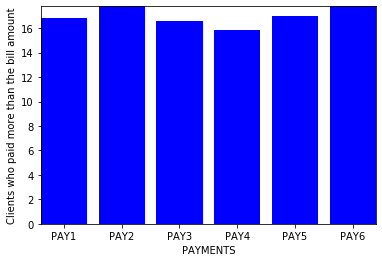

In [57]:
plt.bar(np.arange(1, len(pay_record)+1), ((pay_record)), color='blue')
plt.autoscale(enable=True, tight=True)
plt.xlabel('PAYMENTS')
plt.xticks([1,2,3,4,5,6],('PAY1', 'PAY2', 'PAY3', 'PAY4', 'PAY5', 'PAY6'))
plt.ylabel('Clients who paid more than the bill amount')
plt.show()

#### So percentile of customer who made full payments of the bill amount or more than that changes during various payments cycle with a sin like trendline on top of a large flat background. 

#### Now I want to see whether there is any time correlation in terms of customer who made payments 50% of the bill amount or more than that.

In [45]:
idx = 0
while (idx<6):
    df_bill_pay['bill-pay-50p-binary-'+str(idx+1)] = df_bill_pay.apply(lambda row: 0 if 
    row[df_bill_pay.columns[idx]]*0.5 < row[df_bill_pay.columns[idx+6]] else 1, axis=1)
    idx += 1 
    
df_bill_pay.columns

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Index(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'bill-pay-binary-1', 'bill-pay-binary-2',
       'bill-pay-binary-3', 'bill-pay-binary-4', 'bill-pay-binary-5',
       'bill-pay-binary-6', 'bill-pay-50p-binary-1', 'bill-pay-50p-binary-2',
       'bill-pay-50p-binary-3', 'bill-pay-50p-binary-4',
       'bill-pay-50p-binary-5', 'bill-pay-50p-binary-6'],
      dtype='object')

In [46]:
pay_record_h = []
for idx in range(0,6):
    ctp = df_bill_pay[df_bill_pay.columns[idx+18]].value_counts()[0]*100/df_bill_pay[df_bill_pay.columns[idx+18]].value_counts()[1]
    pay_record_h.append(ctp)
    
print(np.round(pay_record_h, 2))

[27.95 28.3  26.38 25.2  27.1  27.81]


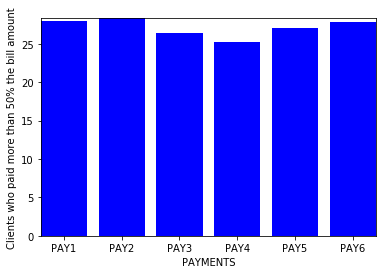

In [56]:
plt.bar(np.arange(1, len(pay_record_h)+1), ((pay_record_h)), color='blue')
plt.autoscale(enable=True, tight=True)
plt.xlabel('PAYMENTS')
plt.xticks([1,2,3,4,5,6],('PAY1', 'PAY2', 'PAY3', 'PAY4', 'PAY5', 'PAY6'))
plt.ylabel('Clients who paid more than 50% the bill amount')
plt.show()

#### As we see clients who paid 50% of the bill or higher on time or before varies based on payment cycle shows trendline not quite similar as the previous one 

#### Analysis in terms of by applied inferential statistics

95% conf. int. on balance limit : $ 430000.0


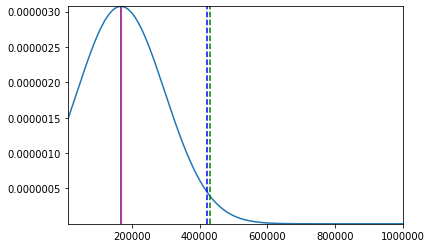

In [60]:
# We will check the relevant inferential analysis on the balance limit 
bal = np.asanyarray(df['LIMIT_BAL'])
bal = np.sort(bal)
conf_int_95 = np.percentile(bal, [95])
print('95% conf. int. on balance limit : $', np.round(conf_int_95[0]))
bal_pdf = norm.pdf(bal, loc=np.mean(bal), scale=np.std(bal))
plt.plot(bal, bal_pdf)
plt.axvline(np.mean(bal), linestyle='-', color='purple')
plt.axvline(conf_int_95, linestyle='--', color='green')
plt.axvline(np.mean(bal)+1.95*np.std(bal), linestyle='--', color='blue')
plt.autoscale(enable=True, tight=True)
plt.show()

In [49]:
# SEX 1== Male, 2==Female, default_payment == 0 means paid
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [50]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [51]:
male_nondefault = df.apply(lambda row: 1 if(row['SEX']==1 and row['default payment next month']==0) else 0, axis=1 ).value_counts()[1]
print('male_nondefault', male_nondefault, ' which is ', male_nondefault*100/30000, '% of the client')

male_nondefault 9015  which is  30.05 % of the client


In [52]:
male_default = df.apply(lambda row: 1 if(row['SEX']==1 and row['default payment next month']==1) else 0, axis=1 ).value_counts()[1]
print('male_default', male_default, ' which is ', np.round(male_default*100/30000), '% of the client')

male_default 2873  which is  10.0 % of the client


In [53]:
female_nondefault =  df.apply(lambda row: 1 if(row['SEX']==2 and row['default payment next month']==0) else 0, axis=1 ).value_counts()[1]
print('female_nondefault', female_nondefault, ' which is ', female_nondefault*100/30000, '% of the client')


female_nondefault 14349  which is  47.83 % of the client


In [54]:
female_default =  df.apply(lambda row: 1 if(row['SEX']==2 and row['default payment next month']==1) else 0, axis=1 ).value_counts()[1]
print('female_default', female_default, ' which is ', np.round(female_default*100/30000), '% of the client')


female_default 3763  which is  13.0 % of the client


In [55]:
# p1 = male_nondefault 9015 / out of total male 11888
# p2 = female_nondefault 14349 / out of total female 18112
# p = the overall sample proportion = (9015+14349)/(11888+18112)

# Two sample proportion test Z = (p1-p2)/sqrt( p(1-p)*(1/n1+1/n2) )

p1 = 9015/11888; print(" p1 = ", p1)
p2 = 14349/18112; print( " p2 = ", p2 )
p = (9015+14349)/(30000); print(" p = ", p )

Z = (p2-p1)/np.sqrt(p*(1-p)*(1/11888 + 1/18112))

print(" Z score for 5% alpha label is 1.96 ")

if Z<1.96:
    print("The hypothesis that the two population has same proportion is valid ")
else:
    print("The hypothesis that the two population has has same proportion is rejected")



 p1 =  0.7583277254374159
 p2 =  0.7922371908127208
 p =  0.7788
 Z score for 5% alpha label is 1.96 
The hypothesis that the two population has has same proportion is rejected
